In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!pip install pandas_datareader
import pandas_datareader
import datetime

     |████████████████████████████████| 107 kB 14.1 MB/s eta 0:00:01


In [10]:
import pandas_datareader.data as web

In [11]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 1)
infosys = web.DataReader("INFY.NS", 'yahoo', start, end)
wipro = web.DataReader("WIPRO.NS", 'yahoo', start, end)
hcl = web.DataReader("HCLTECH.NS", 'yahoo', start, end)

# SAMPLE DATA

In [12]:
infosys.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,495.500000,489.225006,492.237488,493.600006,2002764.0,420.227753
2015-01-02,504.762512,493.000000,493.000000,503.299988,6778320.0,428.485870
2015-01-05,507.500000,494.375000,502.475006,498.975006,9937024.0,424.803772
2015-01-06,496.250000,483.524994,495.000000,488.549988,9667316.0,415.928406
2015-01-07,493.687500,487.500000,491.250000,490.887512,7249916.0,417.918518


In [13]:
wipro.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,207.900055,206.437546,207.206299,207.150055,541274.0,197.326309
2015-01-02,210.093796,207.375046,207.525055,208.987549,2099476.0,199.076660
2015-01-05,211.875046,208.312546,208.893799,209.362549,1919300.0,199.433868
2015-01-06,208.650055,203.287552,208.125046,204.468796,6198347.0,194.772217
2015-01-07,204.375046,201.881302,203.700043,202.912552,4152790.0,193.289749


In [14]:
hcl.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-24,489.500000,480.174988,484.500000,485.174988,5298696.0,439.716309
2018-05-14,468.700012,460.225006,468.700012,462.649994,3132296.0,449.293182
2016-11-10,402.899994,388.000000,395.024994,394.825012,3644546.0,374.650116
2016-08-03,429.250000,408.174988,428.500000,413.075012,19105090.0,386.136597
2017-10-06,454.500000,443.899994,443.899994,453.950012,3640948.0,437.988617


# Visualizing the Data

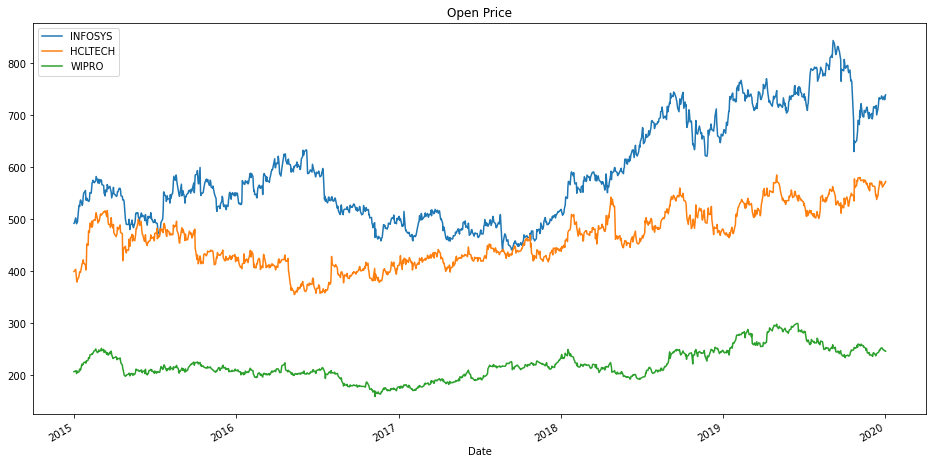

In [15]:
infosys['Open'].plot(label='INFOSYS',figsize=(16,8),title='Open Price')
hcl['Open'].plot(label='HCLTECH')
wipro['Open'].plot(label='WIPRO')
plt.legend()

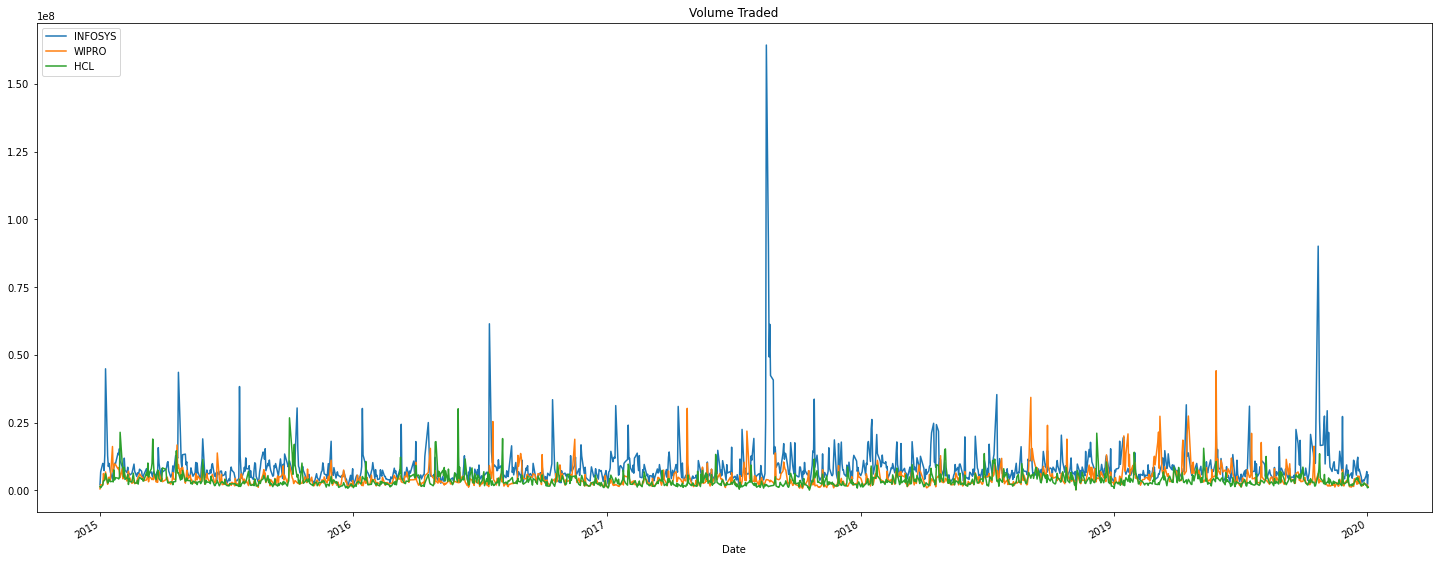

In [16]:
infosys['Volume'].plot(label='INFOSYS',figsize=(25,10),title='Volume Traded')
wipro['Volume'].plot(label='WIPRO')
hcl['Volume'].plot(label='HCL')

plt.legend(loc='upper left')

In [17]:
infosys['Volume'].argmax()

648

In [18]:
infosys['Total Traded'] = infosys['Open']*infosys['Volume']
hcl['Total Trading'] = hcl['Open']*hcl['Volume']
wipro['Total Trading'] = wipro['Open']*wipro['Volume']

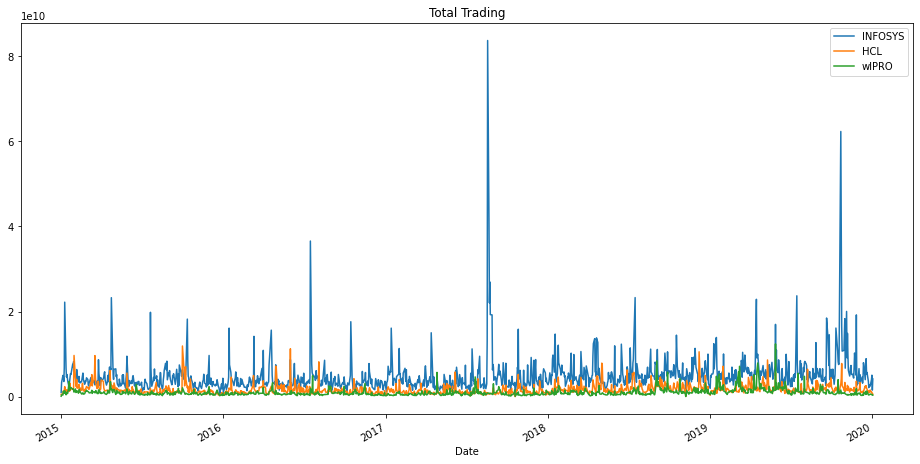

In [19]:
infosys['Total Traded'].plot(label='INFOSYS', figsize=(16,8), title='Total Trading') 
hcl['Total Trading'].plot(label='HCL')
wipro['Total Trading'].plot(label='wIPRO')
plt.legend()

In [20]:
hcl['Volume'].argmax()

346

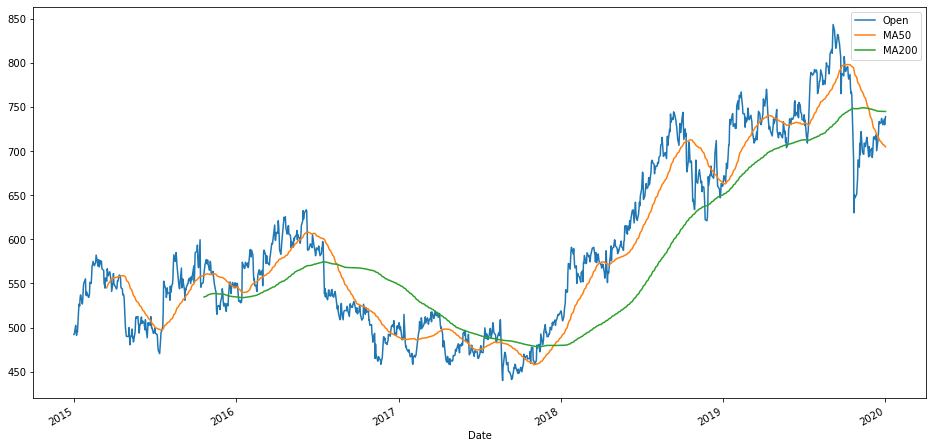

In [21]:
infosys['MA50'] = infosys['Open'].rolling(50).mean()
infosys['MA200'] = infosys['Open'].rolling(200).mean()
infosys[['Open', 'MA50', 'MA200']].plot(label='INFOSYS', figsize=(16,8))


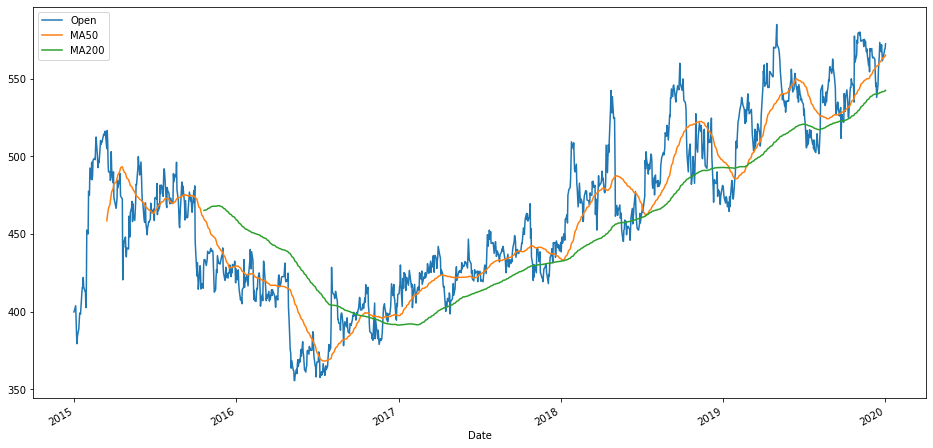

In [22]:
hcl['MA50'] = hcl['Open'].rolling(50).mean()
hcl['MA200'] = hcl['Open'].rolling(200).mean()
hcl[['Open', 'MA50', 'MA200']].plot(label='HCL', figsize=(16,8))


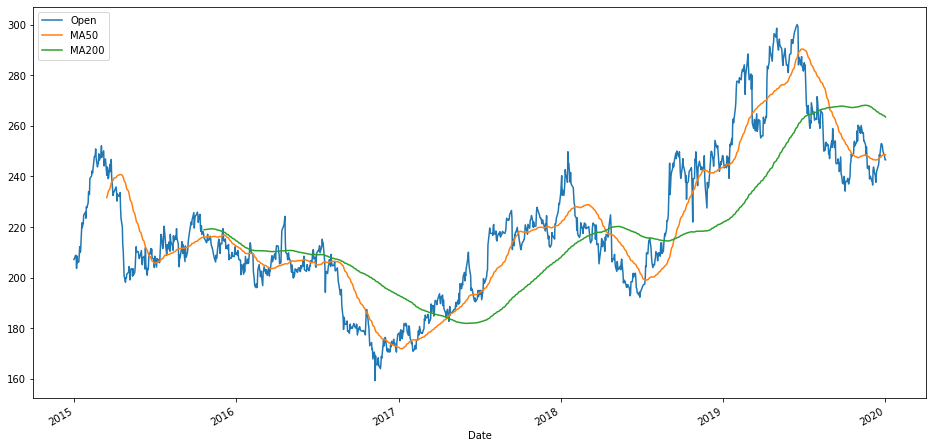

In [23]:
wipro['MA50'] = wipro['Open'].rolling(50).mean()
wipro['MA200'] = wipro['Open'].rolling(200).mean()
wipro[['Open', 'MA50', 'MA200']].plot(label='WIPRO', figsize=(16,8))
plt.legend(loc='upper left')

In [24]:
from pandas.plotting import scatter_matrix

In [25]:
company_comp = pd.concat([infosys['Open'], wipro['Open'], hcl['Open']],axis=1)

In [26]:
company_comp

,Open,Open,Open
Date,,,
2015-01-01,492.237488,207.206299,399.750000
2015-01-02,493.000000,207.525055,400.512512
2015-01-05,502.475006,208.893799,403.750000
2015-01-06,495.000000,208.125046,393.500000
2015-01-07,491.250000,203.700043,384.875000
...,...,...,...
2019-12-27,729.750000,250.000000,562.950012
2019-12-30,736.099976,248.449997,567.000000
2019-12-31,729.700012,247.699997,569.099976


In [27]:
company_comp.columns = ['Infosys Open','Wipro Open','Hcl Open']

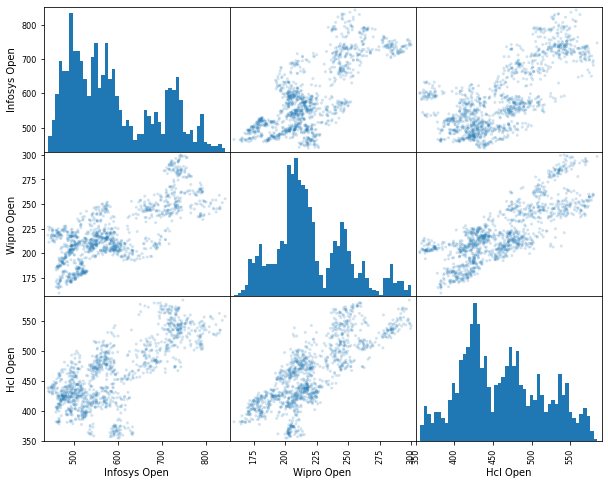

In [28]:
scatter_matrix(company_comp,figsize=(10,8),alpha=0.2,hist_kwds={'bins':50}); 

In [29]:
pip install mpl-finance

Note: you may need to restart the kernel to use updated packages.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


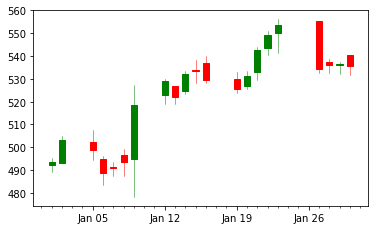

In [30]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
 
#Reset the index to get a column of January Dates
infosys_reset = infosys.loc['2015-01':'2015-01'].reset_index()

#create a new Column of numerical "date" values for matplotlib to use
infosys_reset['date_ax'] = infosys_reset['Date'].apply(lambda date: date2num(date))
infosys_values = [tuple(vals) for vals in infosys_reset[['date_ax','Open','High','Low','Close']].values]
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

#plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, infosys_values, width=0.6, colorup='g', colordown='r');

# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!

# Daily Percentage Change 

First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method.

In [31]:
infosys['returns'] = (infosys['Close'] / infosys['Close'].shift(1) ) - 1

In [32]:
infosys.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2015-01-01,495.500000,489.225006,492.237488,493.600006,2002764.0,420.227753,9.858355e+08,NaN,NaN,NaN
2015-01-02,504.762512,493.000000,493.000000,503.299988,6778320.0,428.485870,3.341712e+09,NaN,NaN,0.019652
2015-01-05,507.500000,494.375000,502.475006,498.975006,9937024.0,424.803772,4.993106e+09,NaN,NaN,-0.008593
2015-01-06,496.250000,483.524994,495.000000,488.549988,9667316.0,415.928406,4.785321e+09,NaN,NaN,-0.020893
2015-01-07,493.687500,487.500000,491.250000,490.887512,7249916.0,417.918518,3.561521e+09,NaN,NaN,0.004785


In [33]:
infosys['returns'] = infosys['Close'].pct_change(1)

In [34]:
infosys.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2015-01-01,495.500000,489.225006,492.237488,493.600006,2002764.0,420.227753,9.858355e+08,NaN,NaN,NaN
2015-01-02,504.762512,493.000000,493.000000,503.299988,6778320.0,428.485870,3.341712e+09,NaN,NaN,0.019652
2015-01-05,507.500000,494.375000,502.475006,498.975006,9937024.0,424.803772,4.993106e+09,NaN,NaN,-0.008593
2015-01-06,496.250000,483.524994,495.000000,488.549988,9667316.0,415.928406,4.785321e+09,NaN,NaN,-0.020893
2015-01-07,493.687500,487.500000,491.250000,490.887512,7249916.0,417.918518,3.561521e+09,NaN,NaN,0.004785


In [35]:
hcl['returns'] = hcl['Close'].pct_change(1)
wipro['returns'] = wipro['Close'].pct_change(1)

In [36]:
hcl.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trading,MA50,MA200,returns
Date,,,,,,,,,,
2015-01-01,402.912506,396.399994,399.750000,401.700012,1336492.0,362.529846,5.342627e+08,NaN,NaN,NaN
2015-01-02,404.737488,400.012512,400.512512,401.312500,933372.0,362.180115,3.738272e+08,NaN,NaN,-0.000965
2015-01-05,403.750000,392.174988,403.750000,394.562500,2012624.0,356.088348,8.125969e+08,NaN,NaN,-0.016820
2015-01-06,393.600006,380.662506,393.500000,384.024994,3470408.0,346.578339,1.365606e+09,NaN,NaN,-0.026707
2015-01-07,387.000000,373.174988,384.875000,374.899994,3540560.0,338.343140,1.362673e+09,NaN,NaN,-0.023761


In [37]:
wipro.head()

,High,Low,Open,Close,Volume,Adj Close,Total Trading,MA50,MA200,returns
Date,,,,,,,,,,
2015-01-01,207.900055,206.437546,207.206299,207.150055,541274.0,197.326309,1.121554e+08,NaN,NaN,NaN
2015-01-02,210.093796,207.375046,207.525055,208.987549,2099476.0,199.076660,4.356939e+08,NaN,NaN,0.008870
2015-01-05,211.875046,208.312546,208.893799,209.362549,1919300.0,199.433868,4.009299e+08,NaN,NaN,0.001794
2015-01-06,208.650055,203.287552,208.125046,204.468796,6198347.0,194.772217,1.290031e+09,NaN,NaN,-0.023375
2015-01-07,204.375046,201.881302,203.700043,202.912552,4152790.0,193.289749,8.459235e+08,NaN,NaN,-0.007611


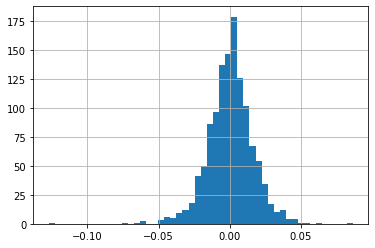

In [38]:
hcl['returns'].hist(bins=50)

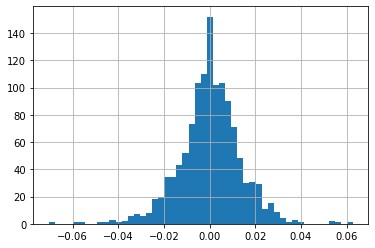

In [39]:
wipro['returns'].hist(bins=50)

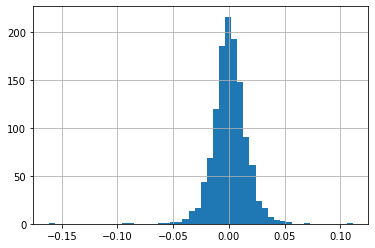

In [40]:
infosys['returns'].hist(bins=50)

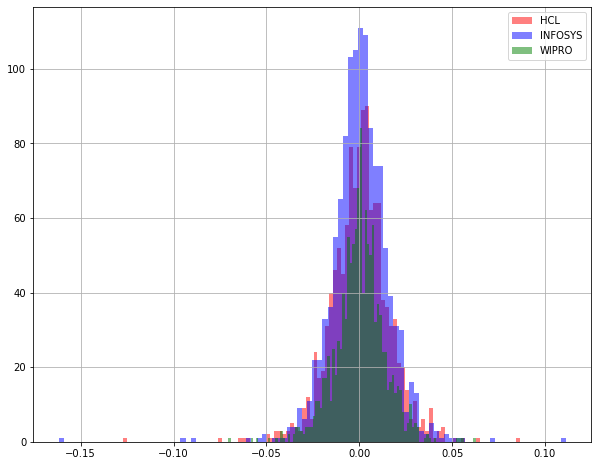

In [41]:
hcl['returns'].hist(bins=100,label='HCL', figsize=(10,8), alpha=0.5, color='r')
infosys['returns'].hist(bins=100,label='INFOSYS', alpha=0.5,color='b')
wipro['returns'].hist(bins=100, label='WIPRO', alpha = 0.5,color='g')
plt.legend()

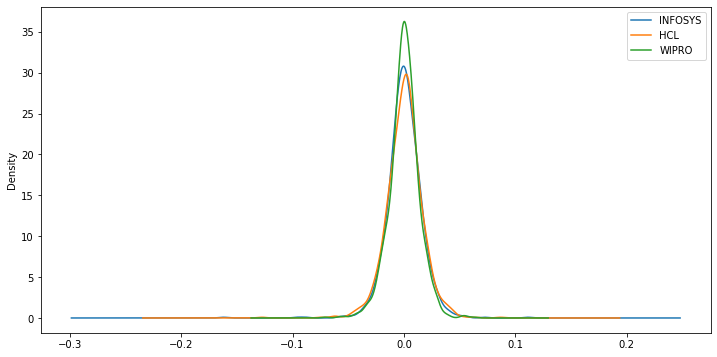

In [42]:
infosys['returns'].plot(kind='kde', label='INFOSYS', figsize=(12,6))
hcl['returns'].plot(kind='kde',label='HCL')
wipro['returns'].plot(kind='kde',label='WIPRO')
plt.legend()

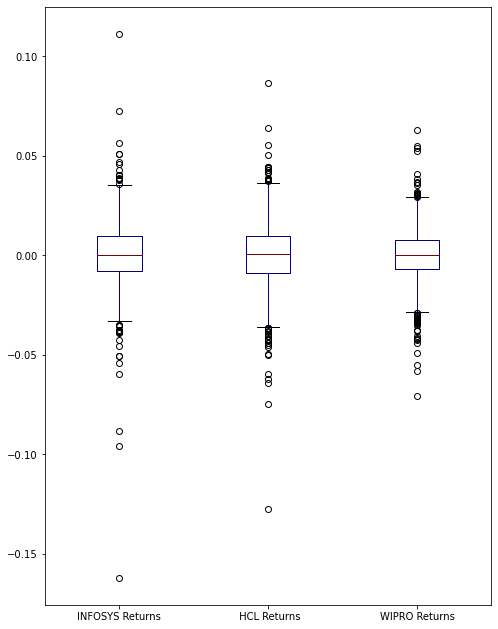

In [43]:
box_df = pd.concat([infosys['returns'],hcl['returns'],wipro['returns']],axis=1)
box_df.columns = ['INFOSYS Returns',' HCL Returns','WIPRO Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

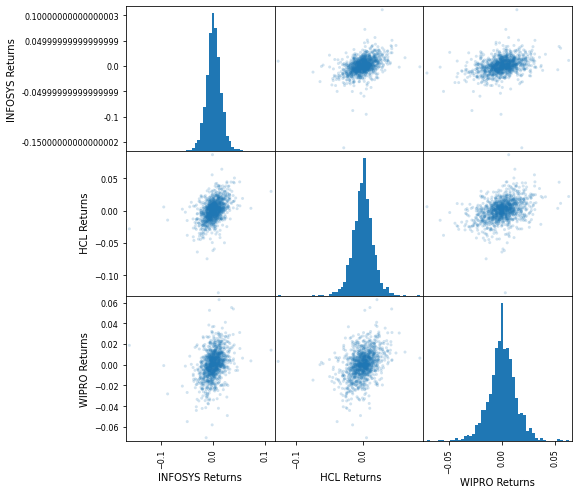

In [44]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


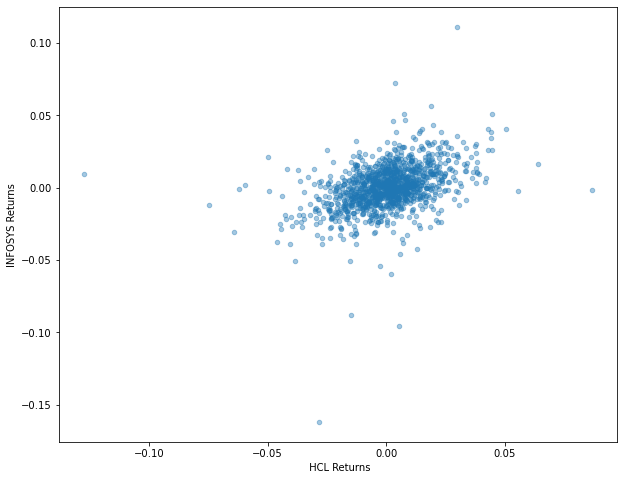

In [45]:
box_df.plot(kind='scatter',x=' HCL Returns',y='INFOSYS Returns',alpha=0.4,figsize=(10,8))

# Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

Date                        Price
01/01/2018                   10
01/02/2018                   15
01/03/2018                   20
01/04/2018                   25

Daily Return : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

Date                         Daily Return                  %Daily Return
01/01/2018                 10/10 =  1                          -   
01/02/2018                 15/10 =  3/2                       50%
01/03/2018                 20/15 =  4/3                       33%
01/04/2018                 25/20 =  5/4                       20%

Cumulative Return: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

Date                       Cumulative Return         %Cumulative Return
01/01/2018                  10/10 =  1                         100 %   
01/02/2018                  15/10 =  3/2                       150 %
01/03/2018                  20/10 =  2                         200 %
01/04/2018                  25/10 =  5/2                       250 %
The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
Create a cumulative daily return column for each car company's dataframe.

In [48]:
pip install --upgrade pandas

     |████████████████████████████████| 9.9 MB 15.5 MB/s eta 0:00:01
ERROR: ibm-watson-machine-learning 1.0.45 has requirement pandas<=1.0.5, but you'll have pandas 1.2.2 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install cumprod()

/usr/bin/sh: -c: line 0: syntax error near unexpected token `('
/usr/bin/sh: -c: line 0: `/opt/conda/envs/Python-3.7-main/bin/python -m pip install cumprod()'
Note: you may need to restart the kernel to use updated packages.


In [54]:
infosys['Cumulative Return'] = (1+ infosys['returns']).cumprod()

In [56]:
infosys.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2015-01-01,495.500000,489.225006,492.237488,493.600006,2002764.0,420.227753,9.858355e+08,NaN,NaN,NaN,NaN
2015-01-02,504.762512,493.000000,493.000000,503.299988,6778320.0,428.485870,3.341712e+09,NaN,NaN,0.019652,1.019652
2015-01-05,507.500000,494.375000,502.475006,498.975006,9937024.0,424.803772,4.993106e+09,NaN,NaN,-0.008593,1.010889
2015-01-06,496.250000,483.524994,495.000000,488.549988,9667316.0,415.928406,4.785321e+09,NaN,NaN,-0.020893,0.989769
2015-01-07,493.687500,487.500000,491.250000,490.887512,7249916.0,417.918518,3.561521e+09,NaN,NaN,0.004785,0.994505


In [57]:
wipro['Cumulative Return'] = (1 + wipro['returns']).cumprod()
hcl['Cumulative Return'] = (1 + hcl['returns']).cumprod()

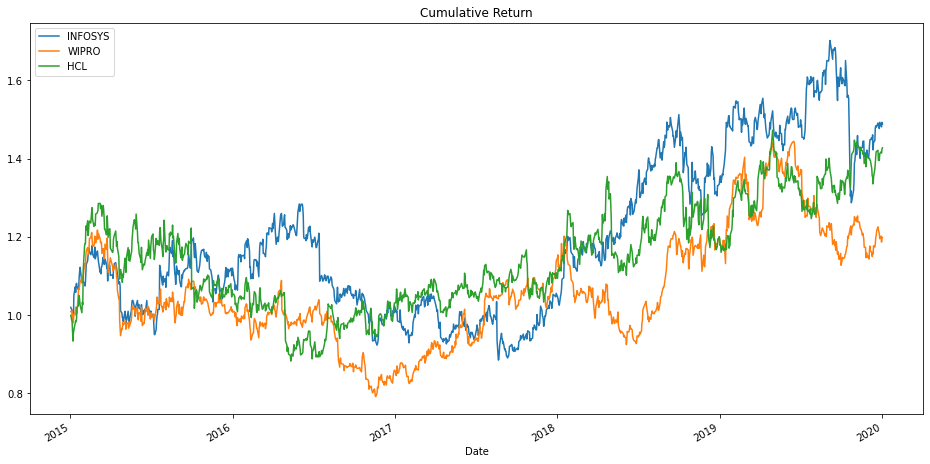

In [58]:
infosys['Cumulative Return'].plot(label='INFOSYS',figsize=(16,8),title='Cumulative Return')
wipro['Cumulative Return'].plot(label='WIPRO')
hcl['Cumulative Return'].plot(label='HCL')
plt.legend()